# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
pip install RateLimiter

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [19]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : ushuaia
City not found. Skipping...
Processing Record 2 of Set 1 : tuktoyaktuk
Processing Record 3 of Set 1 : hermanus
Processing Record 4 of Set 1 : mataura
Processing Record 5 of Set 1 : port hedland
Processing Record 6 of Set 1 : new norfolk
Processing Record 7 of Set 1 : gizo
Processing Record 8 of Set 1 : vaini
Processing Record 9 of Set 1 : karratha
Processing Record 10 of Set 1 : iqaluit
Processing Record 11 of Set 1 : punta arenas
Processing Record 12 of Set 1 : hay river
Processing Record 13 of Set 1 : zhifang
Processing Record 14 of Set 1 : xuddur
Processing Record 15 of Set 1 : busselton
Processing Record 16 of Set 1 : jamestown
Processing Record 17 of Set 1 : havoysund
Processing Record 18 of Set 1 : port lavaca
Processing Record 19 of Set 1 : sutysky
Processing Record 20 of Set 1 : kaitangata
Processing Record 21 of Set 1 : lima
Processing Record 22 of Set 1 : saint-pierre
Processing Rec

Processing Record 38 of Set 4 : oksfjord
Processing Record 39 of Set 4 : sao joaquim
Processing Record 40 of Set 4 : omis
Processing Record 41 of Set 4 : kamina
Processing Record 42 of Set 4 : imbituba
Processing Record 43 of Set 4 : katangli
Processing Record 44 of Set 4 : hambantota
Processing Record 45 of Set 4 : soc trang
Processing Record 46 of Set 4 : uray
Processing Record 47 of Set 4 : chernyakhovsk
Processing Record 48 of Set 4 : harper
Processing Record 49 of Set 4 : marfino
Processing Record 50 of Set 4 : port hardy
Processing Record 0 of Set 5 : nome
Processing Record 1 of Set 5 : nabire
Processing Record 2 of Set 5 : kintampo
Processing Record 3 of Set 5 : yumen
Processing Record 4 of Set 5 : devonport
Processing Record 5 of Set 5 : troitskoye
Processing Record 6 of Set 5 : hithadhoo
Processing Record 7 of Set 5 : ishigaki
Processing Record 8 of Set 5 : provideniya
Processing Record 9 of Set 5 : nanortalik
Processing Record 10 of Set 5 : guamuchil
Processing Record 11 of S

Processing Record 22 of Set 8 : mana
Processing Record 23 of Set 8 : kazachinskoye
Processing Record 24 of Set 8 : sabang
Processing Record 25 of Set 8 : makaleng
Processing Record 26 of Set 8 : saint-michel-des-saints
City not found. Skipping...
Processing Record 27 of Set 8 : mayumba
Processing Record 28 of Set 8 : tabas
Processing Record 29 of Set 8 : klyuchi
Processing Record 30 of Set 8 : sao jose da coroa grande
Processing Record 31 of Set 8 : vostok
Processing Record 32 of Set 8 : sandakan
Processing Record 33 of Set 8 : pangkalanbuun
Processing Record 34 of Set 8 : bose
City not found. Skipping...
Processing Record 35 of Set 8 : mundo nuevo
Processing Record 36 of Set 8 : vagur
Processing Record 37 of Set 8 : shache
Processing Record 38 of Set 8 : matara
Processing Record 39 of Set 8 : nouadhibou
Processing Record 40 of Set 8 : karlskoga
City not found. Skipping...
Processing Record 41 of Set 8 : inyonga
Processing Record 42 of Set 8 : sorong
Processing Record 43 of Set 8 : sal

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,0,AR,1619054789,57,-54.8000,-68.3000,44.60,8.05
1,Tuktoyaktuk,20,CA,1619054901,79,69.4541,-133.0374,12.20,21.85
2,Hermanus,73,ZA,1619054901,86,-34.4187,19.2345,66.99,8.01
3,Mataura,75,NZ,1619054711,84,-46.1927,168.8643,55.00,1.01
4,Port Hedland,6,AU,1619054693,13,-20.3167,118.5667,87.80,19.57
...,...,...,...,...,...,...,...,...,...
552,Zachary,1,US,1619055026,44,30.6485,-91.1565,57.20,5.75
553,Sampit,97,ID,1619055026,57,-2.5333,112.9500,86.65,4.36
554,Al Bardīyah,0,LY,1619055026,71,31.7561,25.0865,58.41,8.81
555,Cap Malheureux,98,MU,1619055026,85,-19.9842,57.6142,77.00,3.00


In [22]:
weather_dict.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

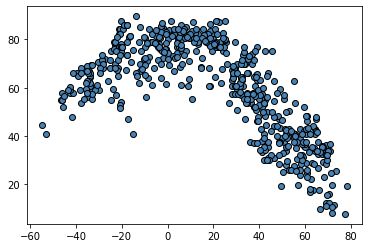

In [24]:
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

## Latitude vs. Humidity Plot

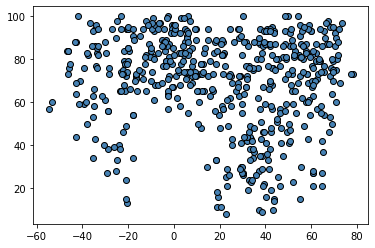

In [25]:
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

## Latitude vs. Cloudiness Plot

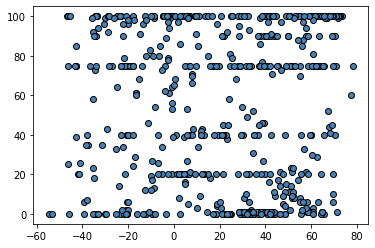

In [26]:
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

## Latitude vs. Wind Speed Plot

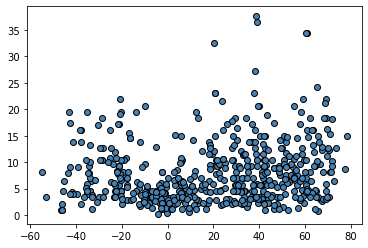

In [27]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [29]:
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

NameError: name 'linear_regression' is not defined

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


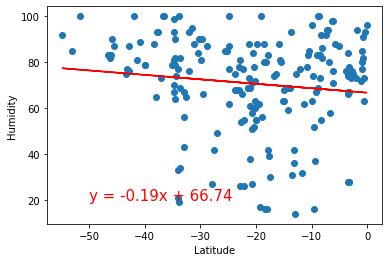

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


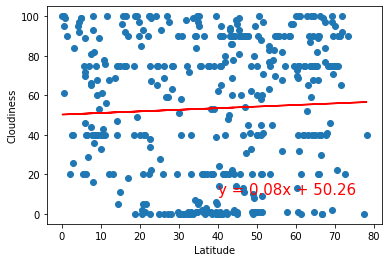

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


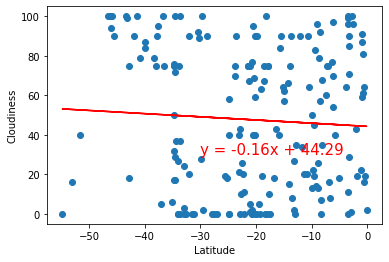

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


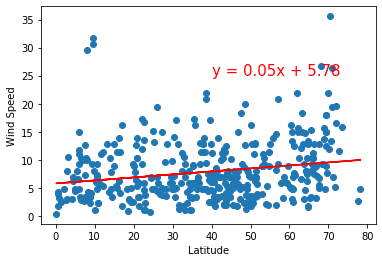

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


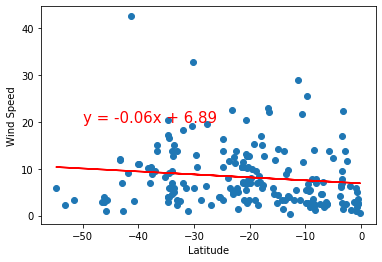